必要なライブラリのインポート

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import GPy
from GPy import kern as gp_kern
import os
import numpy as np
# plt.rcParams['font.family'] = 'MS Gothic'
import itertools
from scipy.stats import norm

: 

データの読み込み

In [30]:
df = pd.read_csv("data.csv",engine='python',encoding='shift-jis')
print(df[df.duplicated(keep=False)]) #数値の重複がないか確認

df = df.set_index('ID')
print(df)
print(len(df))

Empty DataFrame
Columns: [ID, Ni, Ni_Mg, Cu_Ni, Co_Ni, Zn_Ni, Mg, Cu_Mg, Co_Mg, Zn_Mg, Cu, Co_Cu, Zn_Cu, Co, Zn_Co, Zn, energy]
Index: []
            Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  \
ID                                                                        
POSCAR_1     5     13     13     18     18   7     15     14     16   5   
POSCAR_2     9     11     16     11     16   7     15     17     15   5   
POSCAR_3     4     14     14     18     18   6     18     17     11   7   
POSCAR_4     5     13     14     16     19   6     16     17     14   4   
POSCAR_5     5     20     14     16     12   4     11     17     16   6   
...         ..    ...    ...    ...    ...  ..    ...    ...    ...  ..   
POSCAR_96    6     14     13     18     15   4     15     18     17   7   
POSCAR_97    6     12     12     17     19   7     13     18     15   8   
POSCAR_98    5     14     11     19     18   4     16     16     18   4   
POSCAR_99    8     12     12     14  

ガウス過程回帰の処理

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
num = df.shape[1]-1

kernel = gp_kern.RBF(num) * gp_kern.Bias(num) + gp_kern.Linear(num)*gp_kern.Bias(num)
# kernel = gp_kern.RBF(num,ARD=True) * gp_kern.Bias(num) + gp_kern.Linear(num)*gp_kern.Bias(num)

model = GPy.models.GPRegression(X=X.values,
                                Y=y.values,
                                kernel=kernel,
                                normalizer=True)
model.optimize()#messages = True)
# model.optimize_restarts(num_restarts = 2)

データのyと予測されたy'の比較

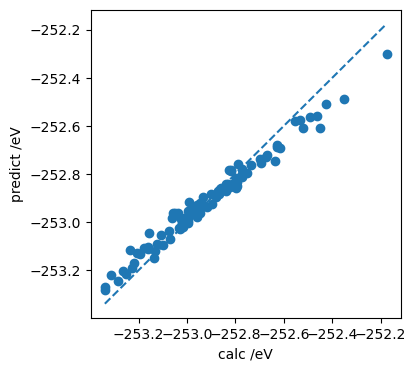

In [32]:
pred_y,_ = model.predict(X.values)
fig_vs = plt.figure(figsize=(4,4))
plt.scatter(y.values.flatten(),pred_y.flatten())
plt.plot([min(y.values),max(y.values)],[min(y.values),max(y.values)],ls='--')
plt.xlabel('calc /eV')
plt.ylabel('predict /eV')
plt.show()

In [33]:
from sklearn.metrics import r2_score

# 相関係数と決定係数の計算
correlation_coefficient = np.corrcoef(y.values.flatten(), pred_y.flatten())[0, 1]
r2 = r2_score(y.values, pred_y)

print(f"相関係数: {correlation_coefficient:.3f}")
print(f"決定係数 (R²): {r2:.3f}")


相関係数: 0.989
決定係数 (R²): 0.945


ガウス過程回帰の結果のプロット(1次元プロット)

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Ni


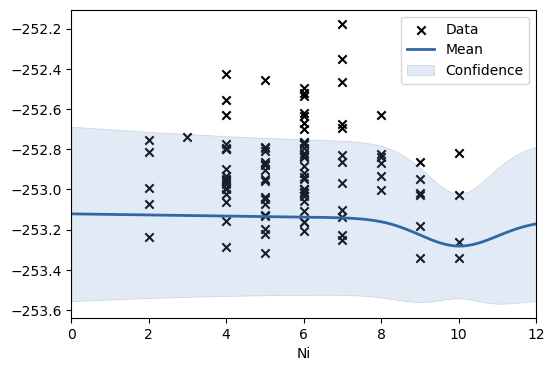

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Ni_Mg


<Figure size 640x480 with 0 Axes>

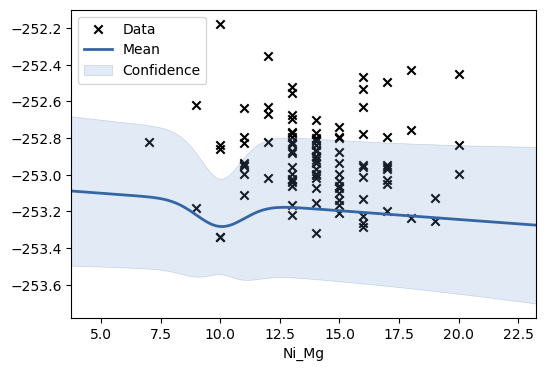

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Cu_Ni


<Figure size 640x480 with 0 Axes>

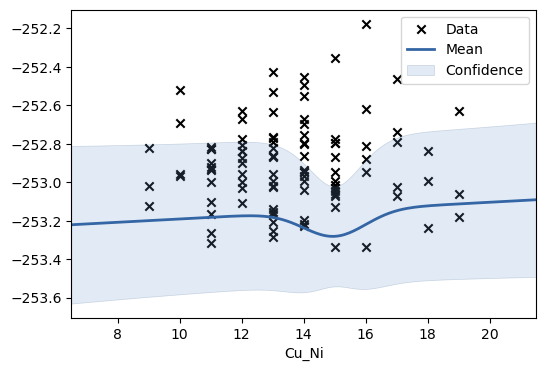

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Co_Ni


<Figure size 640x480 with 0 Axes>

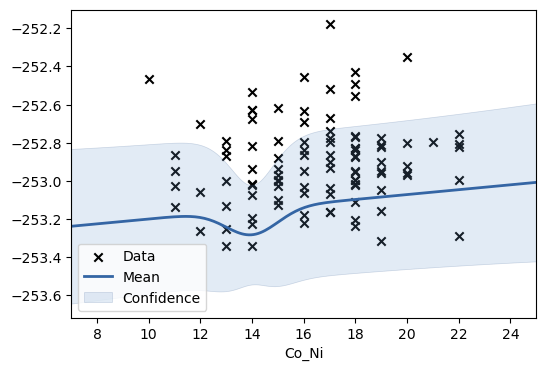

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Zn_Ni


<Figure size 640x480 with 0 Axes>

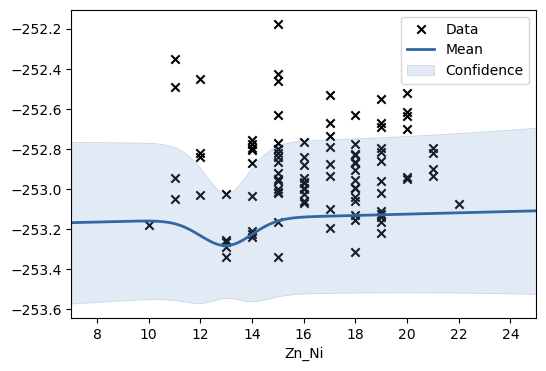

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Mg


<Figure size 640x480 with 0 Axes>

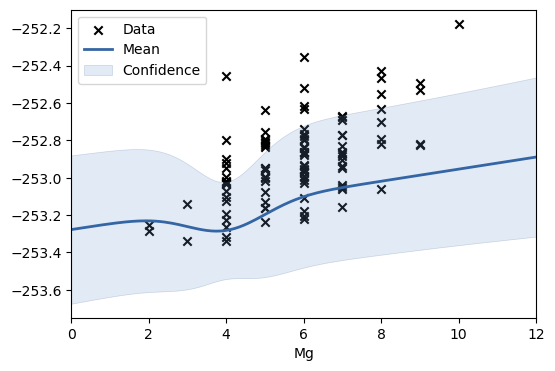

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Cu_Mg


<Figure size 640x480 with 0 Axes>

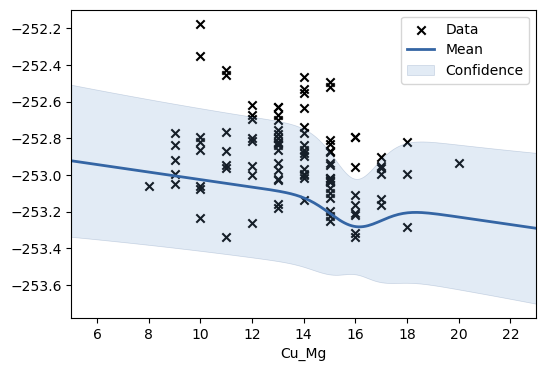

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Co_Mg


<Figure size 640x480 with 0 Axes>

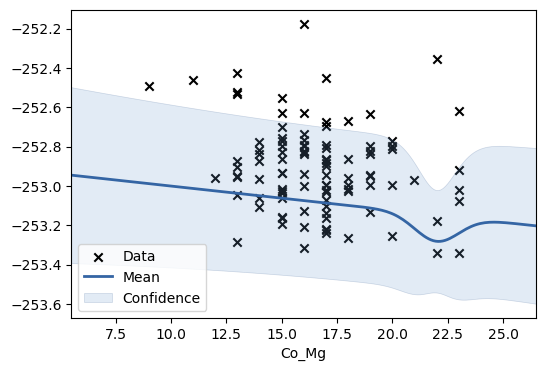

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Zn_Mg


<Figure size 640x480 with 0 Axes>

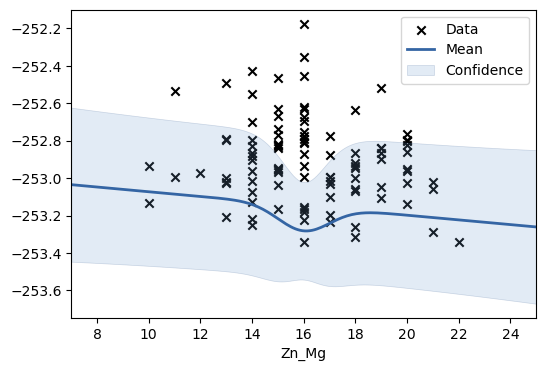

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Cu


<Figure size 640x480 with 0 Axes>

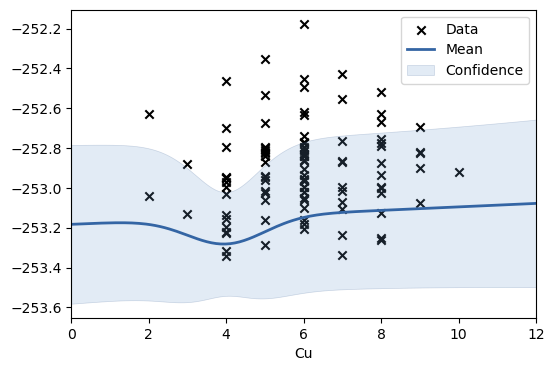

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Co_Cu


<Figure size 640x480 with 0 Axes>

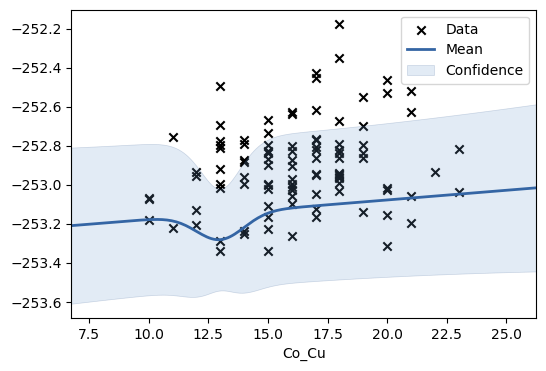

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Zn_Cu


<Figure size 640x480 with 0 Axes>

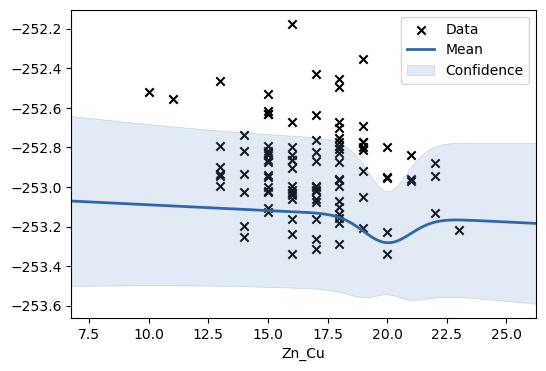

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Co


<Figure size 640x480 with 0 Axes>

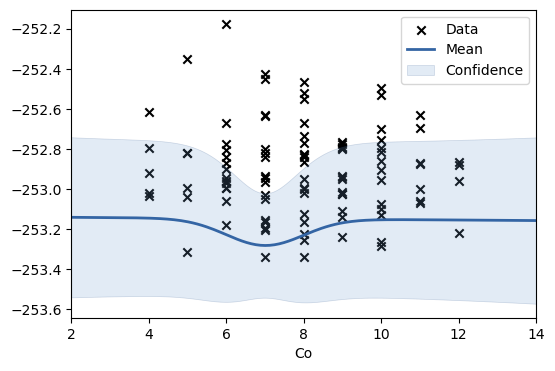

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Zn_Co


<Figure size 640x480 with 0 Axes>

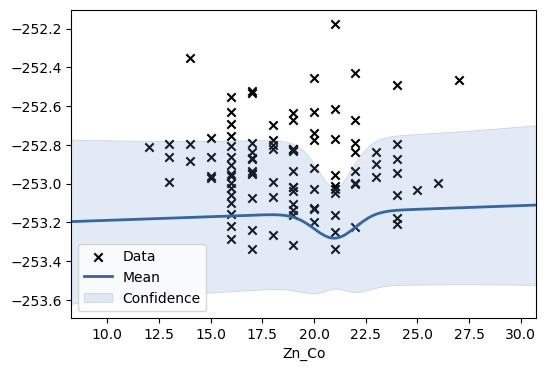

[(0, 10), (1, 10), (2, 15), (3, 14), (4, 13), (5, 4), (6, 16), (7, 22), (8, 16), (9, 4), (10, 13), (11, 20), (12, 7), (13, 21), (14, 7)]
Zn


<Figure size 640x480 with 0 Axes>

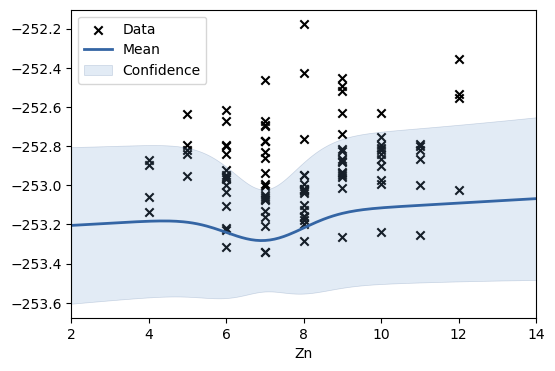

<Figure size 640x480 with 0 Axes>

In [15]:
save_dir = "./images/"
exp_ID = 'POSCAR_21'
# print(X.loc[exp_ID,:])
for i in range(len(X.columns)):
    vis_dim = [(vis1, vis2) for vis1, vis2 in enumerate(X.loc[exp_ID,:])]

    print(vis_dim)

    view_variable = i
    vis_dim.pop(view_variable)
    print(X.columns[view_variable])
    # vis_dim[0] =(0,0)
    # vis_dim[1] =(1,1)
    # Optimize後
    fig = plt.figure(figsize=(6, 4))
    # fig.suptitle(X.columns[i])
    
    ax = fig.add_subplot(111)
    ax.set_xlabel(X.columns[i])
    model.plot(fixed_inputs=vis_dim, plot_density=False,
                    ax=ax)  
    if save_dir != None:
        plt.savefig(os.path.join(save_dir,
                    ""+X.columns[i]+"_.png"))
    #plt.ylim(-4,0)
    plt.show()
    plt.clf()


---

### （これ以降は未完成）

ガウス過程回帰の結果のプロット(2次元プロット)

TypeError: calculated free_dims [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] from visible_dims None and fixed_dims [0] is neither 1D nor 2D

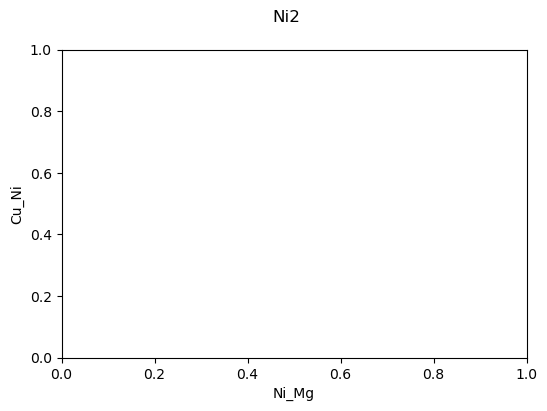

In [8]:
# gd = [40,45,50,55,60]
# eu = [2,4,6,8,10]
# sm = [2,4,6,8,10]
Zn = [2,4,6,8,10]


for i in Zn:
    fig = plt.figure(figsize=(6, 4))
    fig.suptitle(X.columns[0]+ str(i))
    ax = fig.add_subplot(111)
    ax.set_xlabel(X.columns[1])
    ax.set_ylabel(X.columns[2])

    # ax.contour( cmap="jet", levels=10, alpha=1)
    model.plot( 
                fixed_inputs=[(0, i)], 
                plot_data=False,
                ax=ax,
                color=plt.get_cmap('jet')
                )  

ベイズ最適化

獲得関数

In [6]:
# 獲得関数
def acquisition_ucb(mean, std, kappa):
    a = mean + kappa * std
    return a

def acquisition_EI(mean, std, max_value, xi=0.001):
    imp = mean - max_value - xi
    Z = imp/std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    return ei
    

予測する濃度の範囲を指定

In [23]:
# numpyのarangeは(最初の数値、最後の数値、ステップ)で使う。
# 最後の数値を含まないので、最後の数値にはステップ数を足した値を入力しておく。
Gd = np.arange(35,55,1)
Eu = np.arange(15,35,1)
Sm = np.arange(6,25,1)
Y = np.arange(0,100,1)
total_step = len(Gd) * len(Eu) * len(Sm) * len(Y)

各濃度での獲得関数の計算

In [24]:
itera = itertools.product(Gd,Eu,Sm,Y)
# EI用に最大値を取り出しておく
max_value = max(df["Peak"])
means = []
stds = []
acs_ei = []
acs_ucb = []
dates = []
# for item in  tqdm(itera,total=total_step):
for item in  itera:
    # 足して100にならない場合はスキップ
    if sum(item[0:4]) != 100:
        continue
    # print(item)
    dates.append(item)

    #期待値と分散
    mean,val = model.predict(np.array(item).reshape(1,-1))
    #標準偏差
    std = np.sqrt(val)

    #獲得関数(EI)
    ac_ei = acquisition_EI(mean, std, max_value)
    #獲得関数(UCB)
    ac_ucb = acquisition_ucb(mean, std, 7)

    #それぞれをリストにまとめる
    means.append(mean.flatten()[0])
    stds.append(std.flatten()[0])
    acs_ei.append(ac_ei.flatten()[0])
    acs_ucb.append(ac_ucb.flatten()[0])

提案された濃度をPandasデータフレームとして出力

In [25]:
result_df = pd.DataFrame(dates,columns=["Gd","Eu","Sm","Y"])
result_df = result_df.assign(mean=means, std=stds, EI=acs_ei,UCB=acs_ucb)

EIを降順にプロット

In [26]:
result_df_sort = result_df.sort_values("EI",ascending=False)
#上位20個を表示
result_df_sort[:20]
#下位20個を表示
# result_df_sort[-20:]

,Gd,Eu,Sm,Y,mean,std,EI,UCB
379,35,34,24,7,88.916926,16.264549,5.891390,202.768768
378,35,34,23,8,88.933522,16.155449,5.855788,202.021666
377,35,34,22,9,88.953389,16.054673,5.825038,201.336099
376,35,34,21,10,88.976326,15.962448,5.799138,200.713463
361,35,34,6,25,89.103898,15.774139,5.784432,199.522874
375,35,34,20,11,89.000633,15.879267,5.777489,200.155500
374,35,34,19,12,89.023215,15.805846,5.758919,199.664138
362,35,34,7,24,89.094126,15.718660,5.757721,199.124743
373,35,34,18,13,89.040647,15.742917,5.742101,199.241067
363,35,34,8,23,89.084470,15.672811,5.734904,198.794147


UCBを降順にプロット

In [27]:
result_df_sort = result_df.sort_values("UCB",ascending=False)
#上位20個を表示
result_df_sort[:20]
#下位20個を表示
#result_df_sort[-20:]

,Gd,Eu,Sm,Y,mean,std,EI,UCB
379,35,34,24,7,88.916926,16.264549,5.891390,202.768768
759,36,34,24,6,88.573399,16.229904,5.717681,202.182727
378,35,34,23,8,88.933522,16.155449,5.855788,202.021666
1139,37,34,24,5,88.231973,16.195225,5.547853,201.598549
758,36,34,23,7,88.595007,16.120726,5.684300,201.440088
377,35,34,22,9,88.953389,16.054673,5.825038,201.336099
1519,38,34,24,4,87.891959,16.160650,5.381614,201.016507
1138,37,34,23,6,88.260774,16.085570,5.517459,200.859765
757,36,34,22,8,88.622805,16.019376,5.656890,200.758434
376,35,34,21,10,88.976326,15.962448,5.799138,200.713463


In [28]:
result_df_sort = result_df.sort_values("mean",ascending=False)
result_df_sort[:20]
# result_df_sort[-20:]

,Gd,Eu,Sm,Y,mean,std,EI,UCB
6075,51,21,7,21,90.938014,5.719176,2.698046,130.972248
2520,41,27,18,14,90.542139,4.275877,1.909835,120.473281
2140,40,27,18,15,90.348727,5.393222,2.253145,128.101279
2519,41,27,17,15,90.295435,4.749993,1.969312,123.545388
2139,40,27,17,16,90.128567,5.747041,2.282751,130.357854
2539,41,28,18,13,90.111229,7.877838,3.124169,145.256094
2159,40,28,18,14,89.988901,8.400679,3.272158,148.793654
2538,41,28,17,14,89.909526,8.073462,3.102736,146.423760
6094,51,22,7,20,89.838927,6.364227,2.387143,134.388518
2158,40,28,17,15,89.805081,8.568676,3.249410,149.785814
